<a href="https://colab.research.google.com/github/Montenate/Wind-Energy-Modeling/blob/main/Weibull_Distribution_WS10M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.special as sc

In [12]:
WS = pd.read_csv('15 - Wind-Speed.csv')
WS = WS.iloc[:,-1]
WS

,WS10M
0,2.61
1,2.77
2,2.86
3,2.87
4,2.92
...,...
8755,2.73
8756,2.65
8757,2.32
8758,2.21


In [18]:
def weib(x,c,k):
  return (k/c)*((x/c)**(k-1))*np.exp(-(x/c)**k)

k = (math.sqrt(np.mean(abs(WS-np.mean(WS))**2))/np.mean(WS))**-1.089

Gamma_F = math.exp(sc.gammaln(1+(1/k)))
c = (np.mean(WS)/Gamma_F)

Weibull = weib(WS,c,k)
Weibull_DF = pd.DataFrame(Weibull).rename(columns = {'WS10M': 'Probability'})
Weibull_DF

,Probability
0,0.263175
1,0.263308
2,0.262275
3,0.262112
4,0.261159
...,...
8755,0.263515
8756,0.263450
8757,0.256232
8758,0.251299


**Visualization**

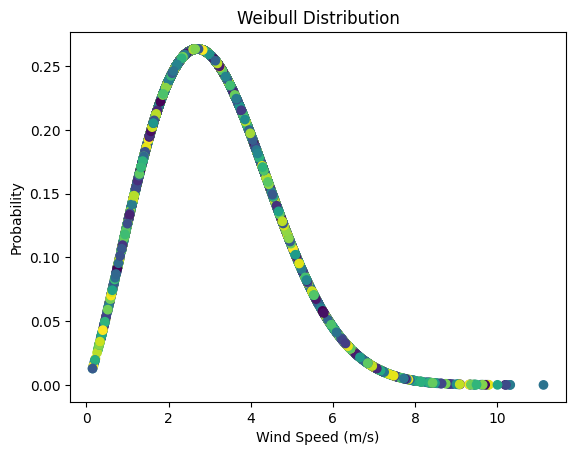

In [19]:
N = 8760
colors = np.random.rand(N)

plt.scatter(WS,Weibull_DF,c = colors, zorder = 2)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Probability')
plt.title('Weibull Distribution')
plt.show()
